In [3]:
# ----------------------------------------
# Step 1: Importing Required Libraries
# ----------------------------------------

import numpy as np                     # For numerical computations
import matplotlib.pyplot as plt        # For plotting the histogram of ad selections
import pandas as pd                    # For reading and handling dataset
import math                            # For logarithm and square root operations used in UCB


In [4]:
# ----------------------------------------
# Step 2: Load the Click Data
# ----------------------------------------

# The dataset contains 10,000 rows (user interactions) and 10 columns (ads).
# Each cell contains either 1 (ad was clicked) or 0 (ad was not clicked).
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')  # Update path if needed


In [5]:
# ----------------------------------------
# Step 3: Initialize Variables
# ----------------------------------------

total_users = 10000          # Total number of user visits (N)
total_ads = 10               # Total different ads available (d)

ads_chosen = []              # List to store which ad was chosen in each round
selection_count = [0] * total_ads      # Number of times each ad has been selected
click_sums = [0] * total_ads           # Total number of clicks for each ad
cumulative_clicks = 0        # Total clicks collected over all users


In [6]:
# ----------------------------------------
# Step 4: Implementing the UCB Strategy
# ----------------------------------------

# Loop over each round (user visit)
for user in range(total_users):
    selected_ad = 0
    highest_ucb = 0

    # Loop through each ad to compute its UCB value
    for ad_index in range(total_ads):
        if selection_count[ad_index] > 0:
            average_click_rate = click_sums[ad_index] / selection_count[ad_index]
            confidence_interval = math.sqrt((1.5 * math.log(user + 1)) / selection_count[ad_index])
            upper_confidence_bound = average_click_rate + confidence_interval
        else:
            upper_confidence_bound = float('inf')  # Ensure all ads are selected at least once

        if upper_confidence_bound > highest_ucb:
            highest_ucb = upper_confidence_bound
            selected_ad = ad_index

    # Store selected ad and update counters
    ads_chosen.append(selected_ad)
    selection_count[selected_ad] += 1

    # Get the reward (click: 1 or no click: 0) from dataset
    reward = dataset.values[user, selected_ad]
    click_sums[selected_ad] += reward
    cumulative_clicks += reward


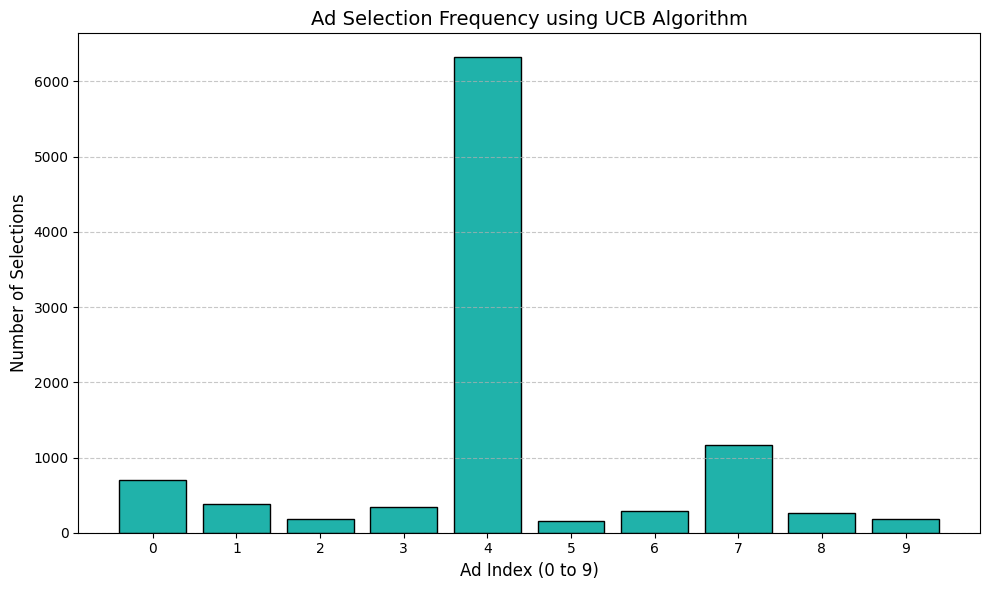

In [7]:
# ----------------------------------------
# Step 5: Visualizing the Selection Results
# ----------------------------------------

plt.figure(figsize=(10, 6))
plt.hist(ads_chosen, bins=np.arange(total_ads + 1) - 0.5, rwidth=0.8, color='lightseagreen', edgecolor='black')
plt.title('Ad Selection Frequency using UCB Algorithm', fontsize=14)
plt.xlabel('Ad Index (0 to 9)', fontsize=12)
plt.ylabel('Number of Selections', fontsize=12)
plt.xticks(range(total_ads))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
# ----------------------------------------
# Step 6: Display Final Performance
# ----------------------------------------

print("✅ Total Clicks Collected by UCB:", cumulative_clicks)
print("🔁 Ad-wise Selection Count:", selection_count)
print("💡 Click-through Rate (CTR) for each ad:")
for i in range(total_ads):
    ctr = round(click_sums[i] / selection_count[i], 4) if selection_count[i] > 0 else 0
    print(f"Ad {i}: {ctr} (Clicks: {click_sums[i]}, Views: {selection_count[i]})")


✅ Total Clicks Collected by UCB: 2178
🔁 Ad-wise Selection Count: [705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
💡 Click-through Rate (CTR) for each ad:
Ad 0: 0.1702 (Clicks: 120, Views: 705)
Ad 1: 0.1214 (Clicks: 47, Views: 387)
Ad 2: 0.0376 (Clicks: 7, Views: 186)
Ad 3: 0.1101 (Clicks: 38, Views: 345)
Ad 4: 0.2649 (Clicks: 1675, Views: 6323)
Ad 5: 0.0067 (Clicks: 1, Views: 150)
Ad 6: 0.0925 (Clicks: 27, Views: 292)
Ad 7: 0.2017 (Clicks: 236, Views: 1170)
Ad 8: 0.0781 (Clicks: 20, Views: 256)
Ad 9: 0.0376 (Clicks: 7, Views: 186)
